<img src="https://comp116sp19.cs.unc.edu/images/COMP116Logo.png" style="display:inline; width:200px" />

# Assignment 2

**Note:** You do not need, nor should you use loops on this assignment. There are more hints down at the [bottom of this notebook](#Hints).

**Remember** always start work at the top of the notebook and execute every cell.

## Setup for the environment

In [1]:
%matplotlib inline
%autosave 15
import numpy as np
import pylab
import pickle

import comp116
check, report = comp116.start('A2')
with open('A2data.pickle', 'rb') as fid:
    classroom = pickle.load(fid)

Autosaving every 15 seconds


## Put your Onyen, Collaborators, and Section

On this and all submissions, it's important to put your Onyen on it.

In [2]:
# Put your onyen between the quotes
Onyen = 'mdubois6'

# If you have no collaborators then remove all the strings from this list
# it should look like Collaborators = [ ]
Collaborators = [ ]

# If you are in the 12:30 T/TH class, set Section='1'
# If you are in the 2:00 T/TH class, set Section='2'
Section = '1' 


In [3]:
# Does the classroom show you as in the section you think you are?
your_info = classroom[ (classroom[:,0] == Section) & (classroom[:,1] == Onyen) ]
if len(your_info) == 0:
    print('The class information does NOT have', Onyen, 'in section', Section)
else:
    print('You are in section', Section)

check('Section', len(your_info) , points=1)
check('Onyen', Onyen in classroom[:, 1], points=1)
check('Collaborators', Collaborators !=  [ 'list', 'their', 'onyens', 'here' ], points=1)

You are in section 1
Section appears correct
Onyen appears correct
Collaborators appears correct


## Learning Objective

In this assignment you'll define **functions** and then use them to define more advanced functions, and then use those for yet more advanced functions. You will apply functions multiple times (functional composition) and see the results.

The problem domain of this assignment is binary images but **functions** are the subject. Don't worry about being asked on exams about image processing. 

Of course, you'll get further practice using the powerful array operations.

# Introduction

In this assignment you will create new functions in Python for processing simple binary images with a single bright object in the foreground, and a dark background. The foreground has intensity 1, and the background intensity 0, so at times it is convenient to think of the image as an matrix of boolean (True/False) data. The images for this assignment came from the [Laboratory for Engineering Man/Machine Systems at Brown University](https://www.brown.edu/research/labs/engineering-man-machine-systems/systems/).

Below left is a binary image that shows a bright square in the dark background.

<img src="files/BinaryImages.png" />

## Producing the images above

Don't worry about being asked on exams about image processing.
These examples are just here to help you visualize the processing that goes on to create an image.

## Example images

The cell below produces an example of creating the images above.

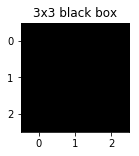

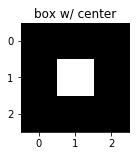

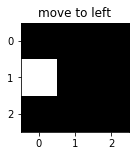

In [4]:
pylab.figure(figsize=(2,2))
pylab.title('3x3 black box')
box = np.zeros(9).reshape(3,3)
pylab.imshow(box, cmap=pylab.gray())

pylab.figure(figsize=(2,2))
pylab.title('box w/ center')
white_center = np.zeros_like(box) # Create a box of zeros of the same dimension as `box`
white_center = np.zeros(9).reshape(3,3)
white_center[1,1] = 1
pylab.imshow(white_center, cmap=pylab.gray())

pylab.figure(figsize=(2,2))
pylab.title('move to left')
move_left = np.zeros_like(white_center)
# Move white_center's to left
move_left[:, :-1] = white_center[:, 1:]
pylab.imshow(move_left, cmap=pylab.gray())

## Part 1: Scrolling the Image

Much of the animation in old video games, like Pacman and Super Mario Brothers, consists of a foreground image scrolling across a fixed background. A few cells above and to the right is what the box image looks like after scrolling left and right, respectively. You can make the foreground in a binary image scroll by clever array indexing.
Some of this scolling is demonstrated in the cell above.

For this part of the assignment, you will create four different functions. Each function will take two parameters; the first is the binary image data, and the second is a number of pixels. Each function will return one value: the new binary image that is the same size as the input image. The names of the functions should be: scrollLeft, scrollRight, scrollUp, scrollDown and they should cause the foreground of the image parameter to move in the appropriate direction by the specified number of pixels. You may assume that the number of pixels specified in the second parameter is always smaller than the size of the image in the relevant direction. You should also assume that the background extends to infinity. When part of the image scrolls off of one side, you should create more 0s on the other side, so that the output image is the same size as the input image.

Text(0.5,1,'Test image')

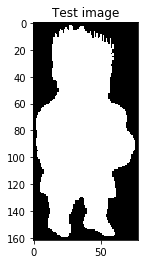

In [5]:
# This is a helper to load images
# you won't need to modify it
def load_binary_image(name):
    '''Load a binary image from a file'''
    im = pylab.imread(name)
    if im.ndim == 3:
        result = im[:, :, 0] != 0
    elif im.ndim == 2:
        result = im != 0
    return result

# and load and display the test image
# don't change this
test_image = load_binary_image('test.png')
pylab.imshow(test_image, cmap=pylab.gray())
pylab.title('Test image')

In [6]:
#slicing an array (row, colomn)

## Write scroll functions

Prototypes for the functions you are to write are included below. **You will add code in each of the functions.**

**Important note** The code you write inside these functions should only refer to the parameters `img` and `amt`; _never_ to the global variable `test_image`.

In [7]:
def scrollLeft(img, amt):
    '''Return a new image that is the given image scrolled left by amt pixels'''
    new = np.zeros_like(img)
    new[:, :-amt] = img[:, amt:]
    
    # do something to fill in values in new here
    return new

def scrollRight(img, amt):
    '''Return a new image that is the given image scrolled right by amt pixels'''
    new = np.zeros_like(img)
    # do something to fill in values in new here
    new[:, amt:] = img[:, :-amt]
    return new

def scrollUp(img, amt):
    '''Return a new image that is the given image scrolled up by amt pixels'''
    new = np.zeros_like(img)
    # do something to fill in values in new here
    new[:-amt, :] = img[amt:, :]
    return new


def scrollDown(img, amt):
    '''Return a new image that is the given image scrolled down by amt pixels'''
    new = np.zeros_like(img)
    # do something to fill in values in new here
    new[amt:, :] = img[:-amt, :]
    return new

# This is a check to help prevent you from using global variables
comp116.no_globals(scrollLeft, scrollRight, scrollUp, scrollDown)

After writing your functions, test them on the image provided with the assignment.

Use your functions to produce the following results. We show a small sample of how your image should appear over to the right.

<img src="files/sample1A.png" style="float: right; height: 150px" />

### 1A. Scroll the image up by 10 pixels.

There's no need to change any code in this cell.
It will test scrollUp function you modified in
the previous cell.

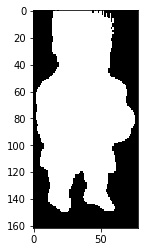

In [8]:
# we provide the code for you this time, no need to change
# anythin in this cell.  It will test scrollUp defined in
# the previous cell
up10 = scrollUp(test_image, 10) # This calls your function from the previous cell

# and display it so you can see your work
pylab.imshow(up10, cmap=pylab.gray())

In [9]:
check('Part 1A', up10, points=4)

Part 1A appears correct


<img src="files/sample1B.png" style="float: right; height: 150px" />

### 1B. Scroll the result of part A down by 10 pixels.

There's no need to change any code in this cell.
It will test scrollDown function you modified in
the previous cell.

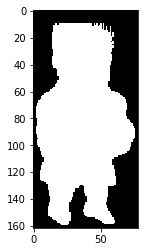

In [10]:
# again we do the test for you
# No need to change any code in this cell.
updown10 = scrollDown(up10, 10)

# and display it so we can see our work
pylab.imshow(updown10, cmap=pylab.gray())

In [11]:
check('Part 1B', updown10, points=4)

Part 1B appears correct


<img src="files/sample1C.png" style="float: right; height: 150px" />

### 1C. Scroll the test image left by half of its width. 

**Note:** Do not hard code the width, you must extract it from the test_image in your code. I will test your submission with an image having different dimensions.

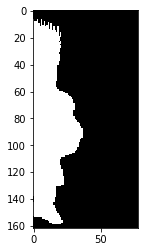

In [12]:
# this time you get to write the code
# put code here to shift test_image to the left by half of its width using your scrollLeft function.

leftByHalf = np.zeros_like(test_image) # replace this with a call to your scrollLeft
amt = ((np.shape(test_image)[-1])//2)
leftByHalf = scrollLeft(test_image,amt)

    
# and display it so we can see our work
pylab.imshow(leftByHalf, cmap=pylab.gray())

In [13]:
check('Part 1C', leftByHalf, points=4)

Part 1C appears correct


<img src="sample1D.png" style="float: right; height: 150px" />

### 1D. Finally, scroll the result of the previous part back to the right by the same amount.

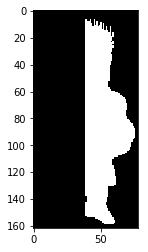

In [14]:
# put code here to shift the leftByHalf image produced above back to the right by the same amount 
# using your scrollRight function.

rightByHalf = np.zeros_like(test_image) # replace this with your code

rightByHalf = scrollRight(leftByHalf,amt)

# and display it so we can see our work
pylab.imshow(rightByHalf, cmap=pylab.gray())

In [15]:
check('Part 1D', rightByHalf, points=5)

Part 1D appears correct


# Part 2: Boundary Detector

A common image-processing task is to identify the boundary (outline) of an object. Conceptually the boundary is the set of all pixels in the foreground that are adjacent to the background. Here is an image of a dachshund and another image of its boundary.

<img src="files/BinaryBoundary.png" />

We can use the scrolling functions from the first part of this assignment to determine if a pixel is on the object boundary or not. Suppose that image is I, and LI is the result of the command:

    LI = scrollLeft(I, 1).

A pixel, [i,j] is on the right edge of the boundary if and only if I[i,j] is foreground and LI[i,j] is background. You can use the other scrolling functions from part 1 to identify the pixels on the other sides of the boundary. Combine these tests together with the correct logical operator, and you will be able to identify the entire boundary of the object. For this part of the assignment you will write one function that has one input parameter: a binary image, and returns a single value, a new binary image, where only the edge of the original object is in the foreground. (The boundary images you produce will have only black and white intensities.) You should name this function `findBoundary`.

**Note:** Do not refer to the global variable `test_image` inside your function. You must only operate on the parameter `img`.

**Hint:** Assume A and B are binary images (boolean arrays) with the same shape. The operation `A & B` produces `True` at pixels where both A and B are `True`. `A | B` produces `True` at pixels where either A or B are `True`. `~A` turns `True` into `False` and `False` into `True`.


In [16]:
def findBoundary(img):
    '''Return an image that is one for boundary pixels and zero elsewhere'''

    # compute the result of finding the boundary here
    result = np.zeros_like(img) # result should be the same size as the img
    result = (~scrollLeft(img,1) & img) | (~scrollRight(img,1) & img) | (~scrollUp(img,1) & img) | (~scrollDown(img,1) & img)
    return result

# check to be sure you didn't use a global variable
comp116.no_globals(findBoundary)

<img src="files/sample2.png" style="float: right; height: 150px" />

Now we can test your function. Your result should look like the sample to the right.

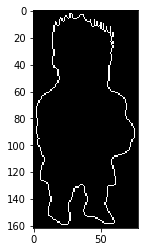

In [17]:
# we'll call the function (no need to change this)
boundary = findBoundary(test_image)
# and display the result
pylab.imshow(boundary, cmap=pylab.gray())

In [18]:
check('Part 2', boundary, points=30)

Part 2 appears correct


### Part 3: Dilate and Erode

Two other famous image processing operations are dilate and erode. Dilate makes the foreground grow into the background, and erode makes the foreground shrink, as if the background were washing it away. Here is an example showing the dilation and erosion of an image of a robot. The original image in the center is from the collection at Brown. The eroded image is on the left, and the dilated image is on the right.

<img src="files/BinaryDilateErode.png" />

It is easy to erode an image – just change the intensity of the boundary from 1 to 0. To dilate an image use a process similar to that you used to find the boundary to smear the image left, right, up, and down. For this problem you must write two, functions, each of which takes an image as an input, and returns a new image as its output. Name these functions `dilateImage` and `erodeImage`.

In [19]:
def findBoundary1(img):
    '''Return an image that is one for boundary pixels and zero elsewhere'''

    # compute the result of finding the boundary here
    result = np.zeros_like(img) # result should be the same size as the img
    result = (scrollLeft(img,1) & ~img) | (scrollRight(img,1) & ~img) | (scrollUp(img,1) & ~img) | (scrollDown(img,1) & ~img)
    return result

# check to be sure you didn't use a global variable
comp116.no_globals(findBoundary1)

In [20]:
# prototypes for your functions

def dilateImage(img):
    '''Return an image that is the dilation of the input img'''
    result = (findBoundary1(img) | img)
    # compute the dilation here and return it below
    return result


def erodeImage(img):
    '''Return an image that is the erosion of the input img'''
    result = (~findBoundary(img) & img) # replace this with your code
    # compute the value of the erosion and return it below
    return result

comp116.no_globals(dilateImage, erodeImage)

And we can test these two functions by applying them in several ways.

<img src="files/sample3A.png" style="float: right; height: 150px" />

**3A.** Dilate the original image, and then dilate that result, and then dilate that result as well. Display the final result.


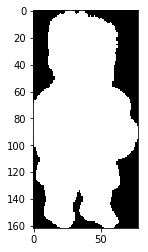

In [21]:
D3 = dilateImage(dilateImage(dilateImage(test_image)))
pylab.imshow(D3, cmap=pylab.gray())

In [22]:
check('Part 3A', D3, points=10)

Part 3A appears correct


<img src="files/sample3B.png" style="float: right; height: 150px" />

**3B.** Erode the original image, and then erode that result, and then erode that result also. Show the final result. 

This time you write the code below by replacing the `np.zeros_like(test_image)` with appropriate nested function calls as in the previous part.

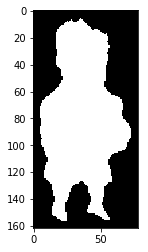

In [23]:
E3 = erodeImage(erodeImage(erodeImage(test_image))) # replace this with your code
pylab.imshow(E3, cmap=pylab.gray())

In [24]:
check('Part 3B', E3, points=10)

Part 3B appears correct


<img src="files/sample3C.png" style="float: right; height: 150px" />

**3C.** Take the image you just produced – the result of three consecutive erosions. Now apply three consecutive dilations to it.

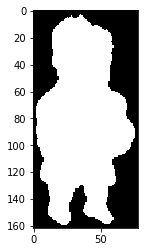

In [25]:
E3D3 = dilateImage(dilateImage(dilateImage(E3))) # replace this with your code
pylab.imshow(E3D3, cmap=pylab.gray())

In [26]:
check('Part 3C', E3D3, points=10)

Part 3C appears correct


<img src="files/sample3D.png" style="float: right; height: 150px" />

**3D.** Find the boundary of the original image, and then dilate the boundary image.

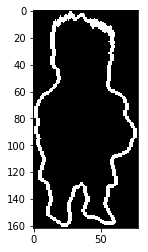

In [27]:
DB = dilateImage(findBoundary(test_image)) # replace this
pylab.imshow(DB, cmap=pylab.gray())

In [28]:
check('Part 3D', DB, points=10)

Part 3D appears correct


<img src="files/sample3E.png" style="float: right; height: 150px" />

**3E.** Then take the original image, dilate it once, and then find its boundary.

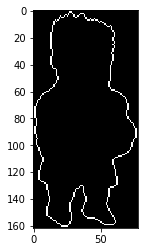

In [29]:
BD = findBoundary(dilateImage(test_image)) # replace this
pylab.imshow(BD, cmap=pylab.gray())

In [30]:
check('Part 3E', BD, points=10)

Part 3E appears correct


## Hints

1. **Global Variables.** Just say no to global variables. You should NOT be referring to test_image in your function bodies. You should only operate on img parameter in the function. If you use test_image in your function body you won't get the right answer when you try to apply it to other images. I've also seen this mistake with boundary; several of you are reusing it in your erode function. You have to compute the boundary of the img argument which will be different from test_image in later steps.
2. **Comparisons to 1 or 0.** Don't compare these images to 0 or 1 like img == 1 or img != 0. There is no need. These things are already True or False.
3. **Adding Images.** Don't combine images (boundaries for example) using addition. You must use the logical or operator "|" to combine them. Addition will look sort of like it works but it doesn't do the right thing.
4. **Clearing Pixels.** The trick to clearing all the pixels on the boundary is to use logical and (&) with the complement of the boundary image.

## Done!
<img src="restartAndClearOutput.png" width="300" style="float: right" />

Now go back, restart the kernel (menu <font color="green">Kernel</font>-><font color="green">Restart and Clear</font>), and then Shift-Enter your way through the notebook to run all the cells again so you an be sure all your code will work as you expect during grading.

## Saving your work
<img src="saveAndCheckpoint.png" width="300" style="float: right" />

Now save your work by going to (menu <font color='green'>File</font>-><font color='green'>Save and Checkpoint</font>)

In [31]:
# don't change this, the values come from the first cell of this notebook.
report(Onyen, Collaborators)
print('The submit button for the assignment is in the unlocker notebook')

Collaborators appears correct
Onyen appears correct
Part 1A appears correct
Part 1B appears correct
Part 1C appears correct
Part 1D appears correct
Part 2 appears correct
Part 3A appears correct
Part 3B appears correct
Part 3C appears correct
Part 3D appears correct
Part 3E appears correct
Section appears correct
Report for mdubois6
The submit button for the assignment is in the unlocker notebook


You must fill in the collaborators variable before you can submit your work.


## Close this notebook and then go back to the AssignmentUnlocker
<img src="closeAndHalt.png" width="300" style="float: right" />

Before going back to the AssignmentUnlocker and submit your work, you'll need to go close this
notebook (menu <font color='green'>File</font>-><font color='green'>Close and Halt</font>.)


Note that if you actually saved your work you should not see the leaving site message below.
If you do see the `Leave Site` warning, cancel and save your work again.
<br />
<img src="leaveSite.png" width="300" style="float: left" />